In [1]:
from google.colab import drive
# Use drive.mount instead of drive._mount
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
from google.colab import drive
import zipfile
import os


# Tentukan path file ZIP dan folder ekstraksi
zip_file_path = '/content/drive/MyDrive/fashionyolov/fashionfull.zip'
extract_path = '/content/drive/MyDrive/fashionyolov/'

# Periksa apakah file ZIP ada
if os.path.exists(zip_file_path):
    print("File ditemukan, melanjutkan ekstraksi...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"File zip telah diekstrak ke {extract_path}")
else:
    print(f"File tidak ditemukan di {zip_file_path}")


File ditemukan, melanjutkan ekstraksi...
File zip telah diekstrak ke /content/drive/MyDrive/fashionyolov/


In [3]:
!ls /content/drive/MyDrive/fashionyolov/


data.yaml  fashionfull.zip  README.roboflow.txt  train	valid


In [4]:
# Install ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 49.7 MB/s eta 0:00:00


In [5]:
# Step 1: Install ultralytics jika belum terinstall
# Jalankan di terminal atau notebook: !pip install ultralytics

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO('yolov8n.pt')  # Bisa diganti dengan yolov8s.pt, yolov8m.pt, dll.

100%|██████████| 6.25M/6.25M [00:00<00:00, 103MB/s]


In [9]:
model.train(
    data='/content/data.yaml',
    epochs=50,       # Kurangi jumlah epoch untuk mempercepat training
    batch=32,         # Batch kecil untuk CPU
    imgsz=640       # Resolusi gambar lebih kecil untuk mengurangi beban
     # Paksa penggunaan CPU
)
#hasil training

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 97.5MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 306MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/fashionyolov/train/labels...:   0%|          | 0/993 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
train: Scanning /content/drive/MyDrive/fashionyolov/train/labels... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:14<00:00, 70.57it/s] 


train: New cache created: /content/drive/MyDrive/fashionyolov/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/fashionyolov/valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:01<00:00, 64.27it/s]


val: New cache created: /content/drive/MyDrive/fashionyolov/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.88G     0.9747      2.971      1.271          5        640: 100%|██████████| 32/32 [01:02<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]

                   all        110        246      0.772     0.0495      0.238       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.45G       1.05      1.992      1.298          2        640: 100%|██████████| 32/32 [00:53<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        110        246      0.651      0.357      0.402      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.4G     0.9835      1.682      1.234          2        640: 100%|██████████| 32/32 [00:53<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


                   all        110        246      0.447      0.344       0.34      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.41G      1.018      1.583      1.246          6        640: 100%|██████████| 32/32 [00:57<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        110        246      0.588      0.493       0.49       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.62G     0.9982      1.529      1.249          5        640: 100%|██████████| 32/32 [00:55<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        110        246      0.599      0.608       0.57      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.48G     0.9776      1.506      1.232          3        640: 100%|██████████| 32/32 [00:53<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all        110        246      0.767      0.545      0.644      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.19G     0.9583      1.307      1.204          7        640: 100%|██████████| 32/32 [00:55<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        110        246      0.707      0.507      0.595       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.72G     0.9556      1.248      1.208          2        640: 100%|██████████| 32/32 [00:54<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        110        246      0.697      0.594      0.658      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.27G      0.922      1.216        1.2          5        640: 100%|██████████| 32/32 [00:58<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all        110        246      0.795      0.637      0.751       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.43G     0.8514      1.111      1.162          4        640: 100%|██████████| 32/32 [00:55<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        110        246      0.803      0.744      0.823      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.24G     0.8391      1.059      1.144          2        640: 100%|██████████| 32/32 [00:55<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        110        246      0.772      0.698      0.764      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.3G     0.8175     0.9922      1.132          3        640: 100%|██████████| 32/32 [00:56<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        110        246      0.787      0.738      0.831      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.3G     0.8468       1.01      1.133          8        640: 100%|██████████| 32/32 [00:57<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        110        246      0.738      0.708      0.764      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.64G     0.8612      0.951      1.152          3        640: 100%|██████████| 32/32 [00:55<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        110        246       0.91      0.714      0.845      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.38G     0.8147     0.9695      1.131          2        640: 100%|██████████| 32/32 [00:57<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        110        246      0.839      0.797      0.859      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.47G     0.8007     0.8978      1.112         10        640: 100%|██████████| 32/32 [00:57<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        110        246      0.867       0.74      0.846      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.27G     0.7784     0.9369      1.105         17        640: 100%|██████████| 32/32 [00:56<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        110        246      0.847       0.79      0.868      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.28G     0.7488      0.816      1.103          4        640: 100%|██████████| 32/32 [00:57<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        110        246      0.879      0.728      0.861      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.42G     0.7587     0.8233      1.096          5        640: 100%|██████████| 32/32 [00:56<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        110        246       0.79      0.778      0.832      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.53G     0.7553     0.7949      1.079          6        640: 100%|██████████| 32/32 [00:57<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        110        246       0.81      0.807      0.825      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.46G     0.7645     0.8339      1.089          2        640: 100%|██████████| 32/32 [00:56<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        110        246      0.835      0.787      0.858      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.38G     0.7488     0.7911      1.078          4        640: 100%|██████████| 32/32 [00:55<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        110        246      0.844      0.809      0.876      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.46G     0.7011     0.7755      1.068          2        640: 100%|██████████| 32/32 [00:56<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        110        246      0.907       0.77      0.888      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.53G     0.7264     0.7565      1.087          3        640: 100%|██████████| 32/32 [00:56<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        110        246      0.926      0.798      0.894      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.27G     0.7106     0.7053      1.063          8        640: 100%|██████████| 32/32 [00:56<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        110        246      0.868      0.817      0.886      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.4G     0.6746     0.6872      1.061          3        640: 100%|██████████| 32/32 [00:56<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all        110        246      0.856      0.803      0.859       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.52G     0.7001     0.7302      1.063          7        640: 100%|██████████| 32/32 [00:57<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        110        246      0.885      0.844      0.916      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.63G      0.709     0.6993      1.057          8        640: 100%|██████████| 32/32 [00:57<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        110        246      0.897      0.802        0.9      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.35G     0.7023     0.7616      1.059          1        640: 100%|██████████| 32/32 [00:54<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        110        246      0.905      0.838      0.917      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.46G      0.675     0.6438      1.059          3        640: 100%|██████████| 32/32 [00:57<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        110        246      0.895      0.862      0.903      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.31G     0.6388     0.6287       1.02          5        640: 100%|██████████| 32/32 [00:56<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        110        246      0.886      0.846      0.911      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.33G     0.6557     0.6247      1.023         10        640: 100%|██████████| 32/32 [00:58<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        110        246      0.939      0.871      0.916      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.19G     0.6534     0.6036      1.041          4        640: 100%|██████████| 32/32 [00:55<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        110        246       0.92      0.865      0.926      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.66G     0.6501     0.6191      1.018          3        640: 100%|██████████| 32/32 [00:55<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        110        246       0.94       0.81      0.908      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.53G     0.6197     0.5615      1.008          4        640: 100%|██████████| 32/32 [00:56<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all        110        246      0.942      0.875      0.934      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.44G     0.6275     0.5531      1.005          5        640: 100%|██████████| 32/32 [00:54<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        110        246      0.939       0.87       0.93      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.65G     0.5997     0.6742      1.009          1        640: 100%|██████████| 32/32 [00:56<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        110        246      0.932       0.88      0.931      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       4.7G     0.6338     0.6082       1.04          2        640: 100%|██████████| 32/32 [00:57<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        110        246       0.91      0.863      0.927      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.21G     0.5898     0.5519     0.9995         15        640: 100%|██████████| 32/32 [00:53<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all        110        246      0.888      0.886      0.931      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.3G     0.6023     0.5242     0.9932         11        640: 100%|██████████| 32/32 [00:55<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        110        246      0.944      0.879      0.934      0.797


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.5G     0.5503      0.513     0.9599          1        640: 100%|██████████| 32/32 [00:58<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        110        246      0.908      0.894      0.935      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.45G     0.5737     0.5695     0.9545          2        640: 100%|██████████| 32/32 [00:57<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        110        246      0.945      0.859      0.927      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.51G     0.5667     0.5151     0.9914          1        640: 100%|██████████| 32/32 [00:56<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all        110        246      0.923      0.871      0.926      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.39G     0.5722       0.43      0.947          1        640: 100%|██████████| 32/32 [00:56<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        110        246      0.938      0.867      0.933      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.36G     0.4757     0.4282      0.925          1        640: 100%|██████████| 32/32 [01:01<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        110        246      0.949       0.88      0.931      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.43G     0.4714     0.4015     0.9213          1        640: 100%|██████████| 32/32 [00:57<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        110        246      0.927      0.883      0.946       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.4G     0.4818     0.4291     0.9279          1        640: 100%|██████████| 32/32 [00:55<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        110        246      0.922      0.897      0.938      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.39G     0.5193     0.5322     0.9373          1        640: 100%|██████████| 32/32 [00:56<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        110        246      0.922      0.884      0.931      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.31G     0.5376     0.4006      0.976          1        640: 100%|██████████| 32/32 [00:55<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        110        246      0.939      0.876       0.93      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.41G     0.4699     0.3978     0.9387          1        640: 100%|██████████| 32/32 [00:52<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all        110        246      0.941      0.875      0.932      0.814



50 epochs completed in 0.864 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]


                   all        110        246      0.927      0.883      0.946       0.82
                  bags         27         84      0.961      0.929      0.968       0.79
                shirts         28         34      0.947      0.853      0.944      0.887
                 shoes         33         59      0.873       0.78      0.891      0.713
                shorts         26         33      0.939      0.935      0.971       0.89
               watches         22         36      0.915      0.917      0.958      0.821
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bedf34343d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [10]:
# Step 4: Evaluasi model
metrics = model.val()
print("Evaluation Metrics:", metrics)
#hasil testing

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/fashionyolov/valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


                   all        110        246      0.927      0.883      0.946      0.818
                  bags         27         84      0.961      0.929      0.968      0.788
                shirts         28         34      0.947      0.853      0.944      0.886
                 shoes         33         59      0.873       0.78      0.888      0.708
                shorts         26         33      0.939      0.935      0.971       0.89
               watches         22         36      0.915      0.917      0.958      0.817
Speed: 0.4ms preprocess, 7.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train32
Evaluation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bedf3691ff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confide

In [11]:
# Step 5: Load gambar untuk inference
image_path = '/content/cihuy.jpg'  # Ganti dengan path gambar Anda
results = model.predict(source=image_path, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/sdmad.jpg: 640x640 1 shirts, 1 shorts, 18.3ms
Speed: 7.3ms preprocess, 18.3ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


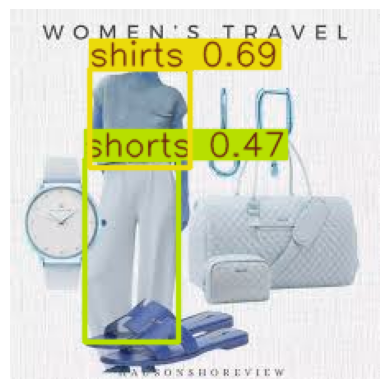

In [12]:
result_img = results[0].plot()
plt.imshow(result_img)
plt.axis('off')
plt.show()


In [13]:
model_path = 'best_fashion_model_yolov.pt'
model.export(format='torchscript')
#jika kita ingin load pakai pytorch

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (5.9 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.0s, saved as 'runs/detect/train3/weights/best.torchscript' (11.9 MB)

Export complete (3.7s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo predict task=detect model=runs/detect/train3/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train3/weights/best.torchscript imgsz=640 data=/content/data.yaml  
Visualize:       https://netron.app


'runs/detect/train3/weights/best.torchscript'